# In-Depth: ROC

ROC is a particular way to measure performance in a classification problem. When we need to check or visualize the performance of the multi-class classification problem, we use AUS (Area Under the Curve). It is one of the most important evaluation metrics for checking any classificaation model's performance. 

We begin with necessary standard imports.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# Data Preperation

We begin this section by importing IRIS dataset. We are using OneHotEncoder to encode teh integer feature into One-Hot vector and we use Standard Scalar to remove mean and scale the unit varience.

To prepare the data, we will simply use the OneHotEncoder to encode the integer features into a One-hot vector and we will use a StandardScaler to remove the mean and scale the features to unit variance. Finally we want to perform a train test split to compare our results later on

In [0]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# ignore the warnings#
#Ignore the warning during compilation.
iris = load_iris() #YOUR CODE HERE to load the dataset 
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# One hot encoding
enc = OneHotEncoder()
Y = enc.fit_transform(y[:, np.newaxis]).toarray()

# Scale data to have mean 0 and variance 1 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.5, random_state=2)

n_features = X.shape[1]
n_classes = Y.shape[1]

#  Visualize the Data


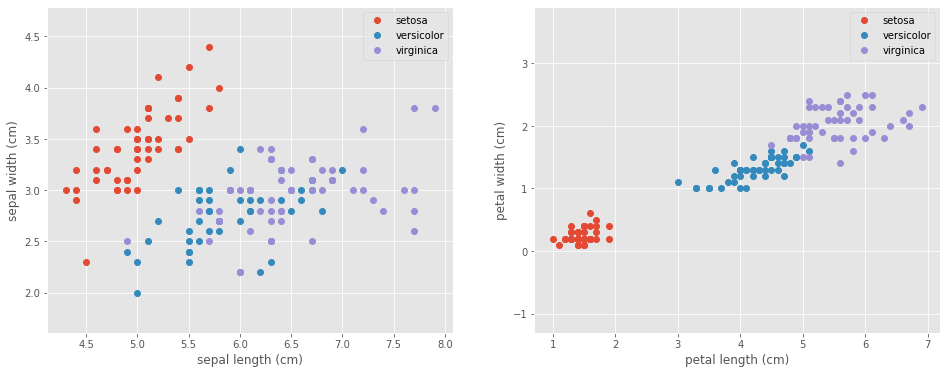

In [3]:
# Visualize the data sets
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    plt.plot(X_plot[:, 0], X_plot[:, 1], linestyle='none', marker='o', label=target_name)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.axis('equal')
plt.legend();

plt.subplot(1, 2, 2)
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    plt.plot(X_plot[:, 2], X_plot[:, 3], linestyle='none', marker='o', label=target_name)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[3])
plt.axis('equal')
plt.legend();

# Configure the Neural Network Model
Now we configure the neural network and we take a look at the summary of the models.

In [4]:
from keras.models import Sequential
from keras.layers import Dense

def create_custom_model(input_dim, output_dim, nodes, n=1, name='model'):
    def create_model():
        # Create model
        model = Sequential(name=name) #YOUR CODE HERE create sequential model
        for i in range(n):
            model.add(Dense(nodes, input_dim=input_dim, activation='relu'))
        model.add(Dense(output_dim, activation='softmax'))

        # Compile model
        model.compile(loss='categorical_crossentropy', 
                      optimizer='adam', 
                      metrics=['accuracy'])
        return model
    return create_model

models = [create_custom_model(n_features, n_classes, 8, i, 'model_{}'.format(i)) 
          for i in range(1, 4)]

for create_model in models:
    create_model().summary()

Using TensorFlow backend.







Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 27        
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 27        
Total params: 139
Trainable params: 139
N

# **Train the Model**

Here we are using tensorflow to accelerate the training and additionally we use Tensorboard as a callback if we want to explore the model in detail.

In [5]:
from keras.callbacks import TensorBoard

history_dict = {}

# TensorBoard Callback
cb = TensorBoard()

for create_model in models:
    model = create_model()
    print('Model name:', model.name)
    history_callback = model.fit(X_train, Y_train,
                                 batch_size=5,
                                 epochs=50,
                                 verbose=0,
                                 validation_data=(X_test, Y_test),
                                 callbacks=[cb])
    score = model.evaluate(X_test, Y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    
    history_dict[model.name] = [history_callback, model] #YOUR CODE HERE

Model name: model_1
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where











Test loss: 0.3029517940680186
Test accuracy: 0.92
Model name: model_2
Test loss: 0.1992000679175059
Test accuracy: 0.92
Model name: model_3
Test loss: 0.12003416319688161
Test accuracy: 0.9333333333333333


# Plot Accuracy and loss from training

This section deals with how our model performs. We can improve our training perfromance by adding additional nodes .

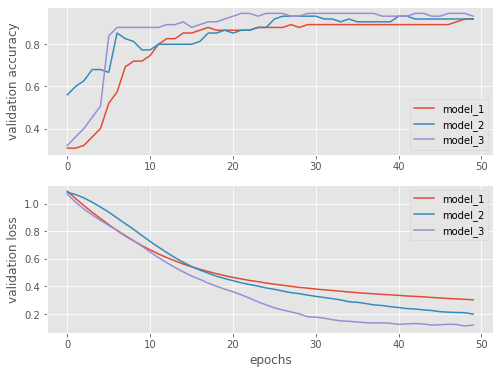

In [6]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

for model_name in history_dict:
    val_acc = history_dict[model_name][0].history['val_acc'] #YOUR CODE HERE for Validation accuracy
    val_loss = history_dict[model_name][0].history['val_loss'] #YOUR CODE HERE  for Curve validation loss
    ax1.plot(val_acc, label=model_name)
    ax2.plot(val_loss, label=model_name)
    
ax1.set_ylabel('validation accuracy')
ax2.set_ylabel('validation loss')
ax2.set_xlabel('epochs')
ax1.legend()
ax2.legend()
plt.show()

# Plot the ROC Curve

We have already split the data to compare how our model performed. We can do this by plotting the ROC and compare the false positive and true positive rate. 

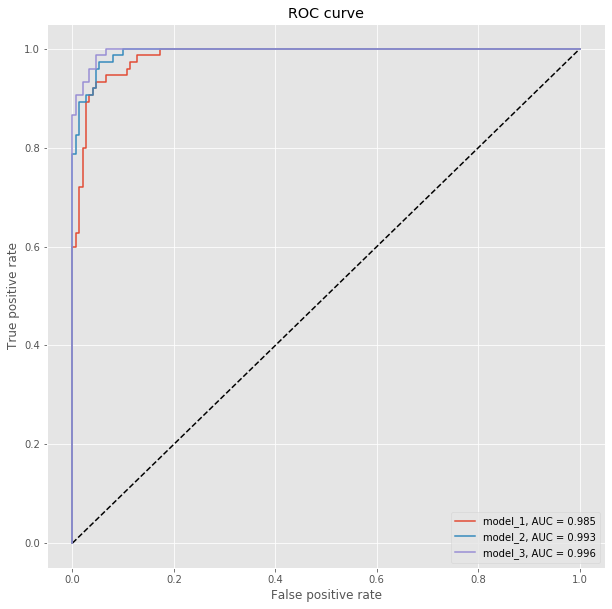

In [7]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], 'k--')

for model_name in history_dict:
    model = history_dict[model_name][1]
    
    Y_pred = model.predict(X_test)
    fpr, tpr, threshold = roc_curve(Y_test.ravel(), Y_pred.ravel()) #YOUR CODE HERE construct ROC Curve
    
    plt.plot(fpr, tpr, label='{}, AUC = {:.3f}'.format(model_name, auc(fpr, tpr)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend();